In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

In [3]:
# Cargar dataset
df_movies = pd.read_csv('movies.csv')

In [16]:
# Información básica del dataset
print("Información del Dataset:")
print(df_movies.info())

print("\nPrimeras filas del Dataset:")
print(df_movies.head())

# Resumen de valores nulos
print("\nValores nulos por columna:")
print(df_movies.isnull().sum())


Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7018 entries, 0 to 7017
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      7018 non-null   int64  
 1   id                          7018 non-null   int64  
 2   original_language           7018 non-null   object 
 3   overview                    7018 non-null   object 
 4   popularity                  7018 non-null   float64
 5   release_date                7018 non-null   object 
 6   revenue                     7018 non-null   float64
 7   runtime                     7018 non-null   float64
 8   status                      7018 non-null   object 
 9   tagline                     5686 non-null   object 
 10  title                       7018 non-null   object 
 11  vote_average                7018 non-null   float64
 12  vote_count                  7018 non-null   float64
 13  collecti

01 TIPOS DE DATOS Y ESTADISTICA DESCRIPTIVA

In [17]:
# Tipos de datos
print("\nTipos de datos:")
print(df_movies.dtypes)

# Resumen estadístico de variables numéricas
print("\nEstadísticas descriptivas de variables numéricas:")
print(df_movies.describe())

# Resumen estadístico de variables categóricas
print("\nResumen de variables categóricas:")
cat_columns = df_movies.select_dtypes(include='object').columns
print(df_movies[cat_columns].describe())



Tipos de datos:
budget                          int64
id                              int64
original_language              object
overview                       object
popularity                    float64
release_date                   object
revenue                       float64
runtime                       float64
status                         object
tagline                        object
title                          object
vote_average                  float64
vote_count                    float64
collection_name                object
genre_names                    object
production_companies_names     object
production_countries_names     object
spoken_languages_names         object
release_year                    int64
return                        float64
actor_names                    object
director                       object
dtype: object

Estadísticas descriptivas de variables numéricas:
             budget             id   popularity       revenue      runtime  \
coun

- Variables numericas

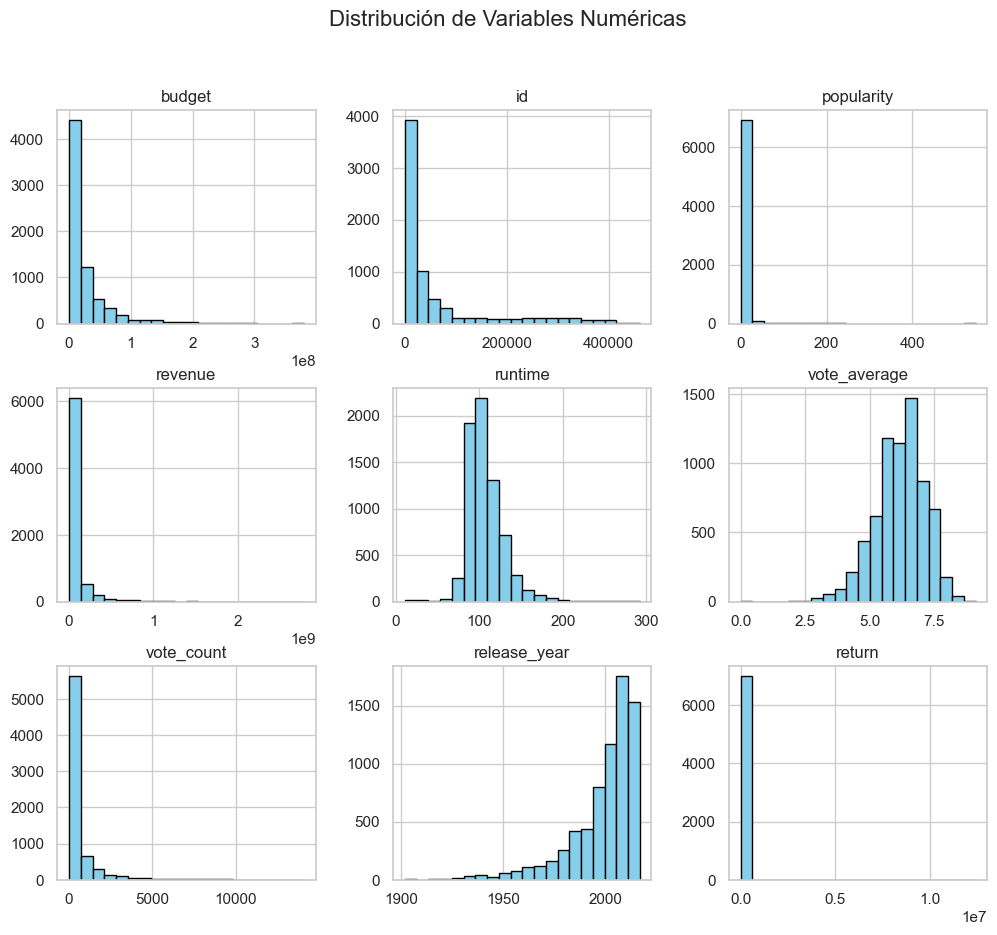

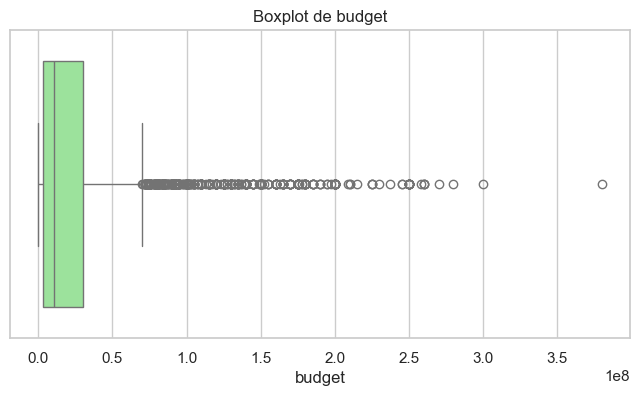

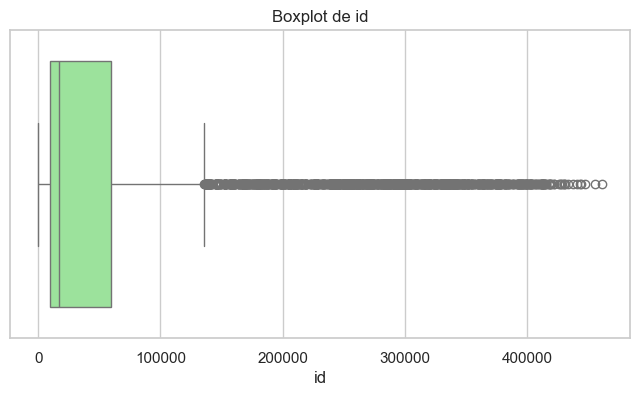

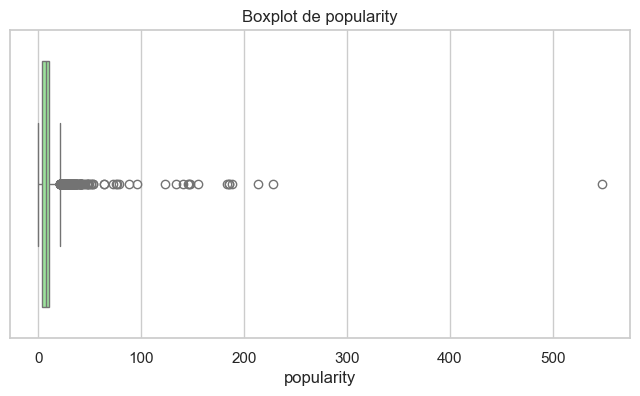

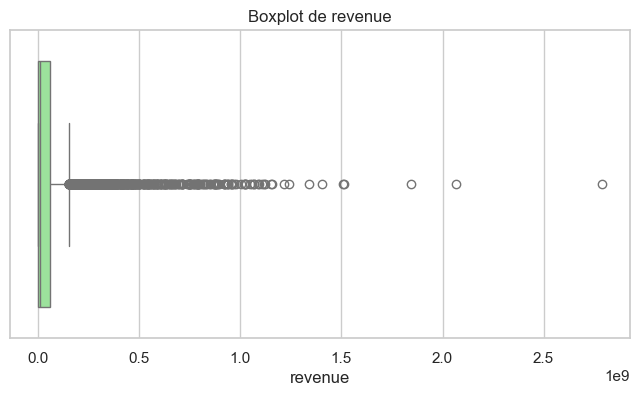

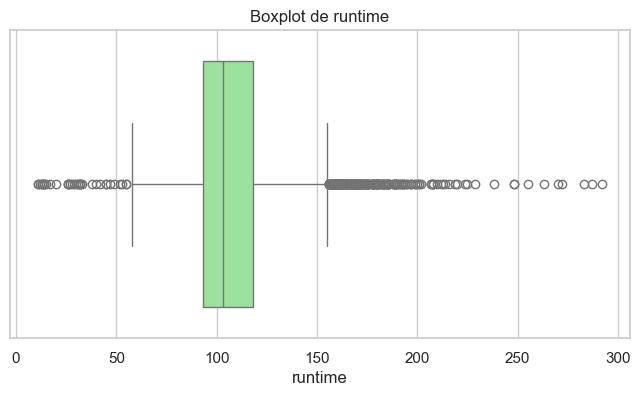

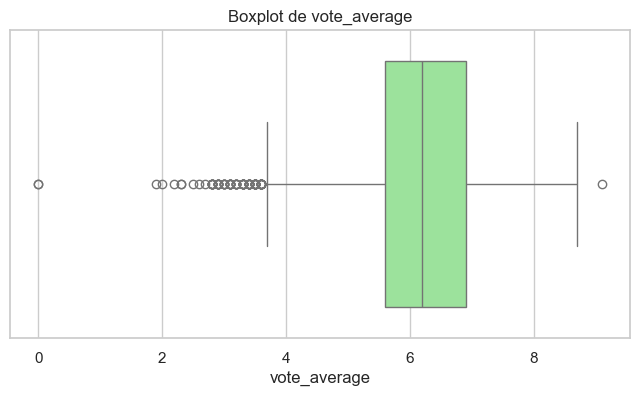

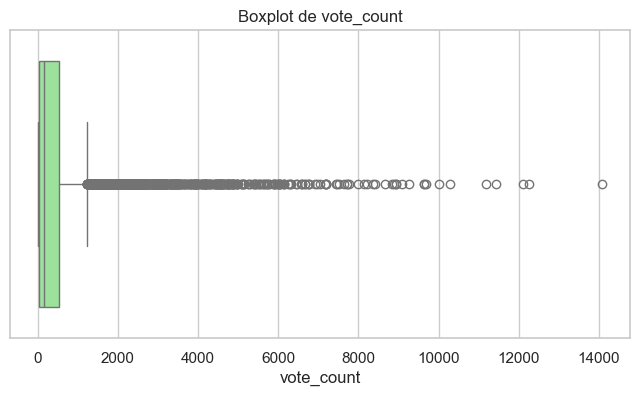

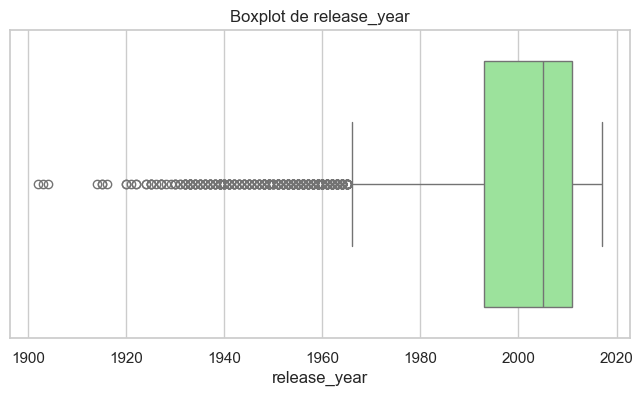

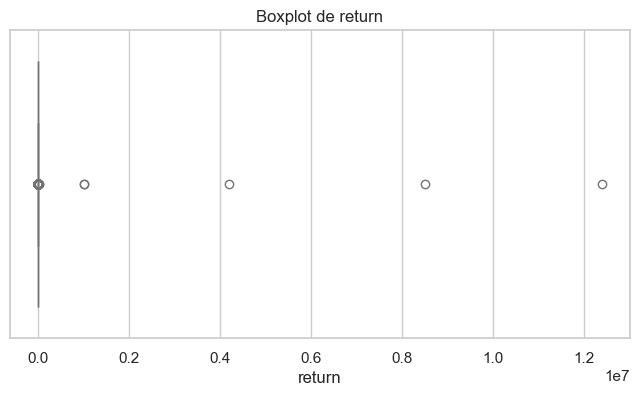

In [18]:
# Histogramas de variables numéricas
num_columns = df_movies.select_dtypes(include=['float64', 'int64']).columns
df_movies[num_columns].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()

# Boxplots para detectar outliers
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_movies[col], color='lightgreen')
    plt.title(f"Boxplot de {col}")
    plt.show()

- Variables categoricas

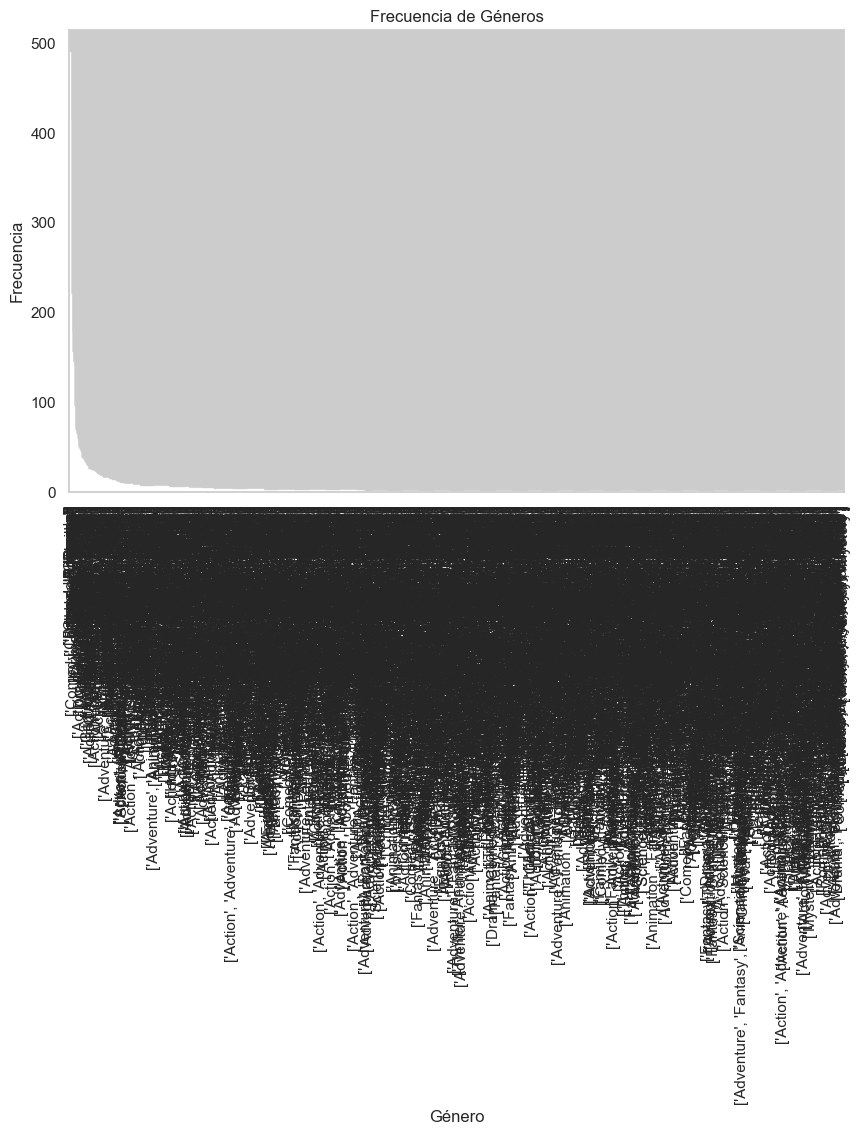

In [19]:
# Frecuencia de géneros
df_movies['genre_names'].value_counts().plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Frecuencia de Géneros")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.show()


02 ANALISIS DE CORRELACIONES

Columnas numéricas seleccionadas para el heatmap:
     budget     id  popularity      revenue  runtime  vote_average  \
0  30000000    862   21.946943  373554033.0     81.0           7.7   
1  65000000   8844   17.015539  262797249.0    104.0           6.9   
2  16000000  31357    3.859495   81452156.0    127.0           6.1   
3  60000000    949   17.924927  187436818.0    170.0           7.7   
4  58000000  11860    6.677277          0.0    127.0           6.2   

   vote_count  release_year     return  
0      5415.0          1995  12.451801  
1      2413.0          1995   4.043035  
2        34.0          1995   5.090760  
3      1886.0          1995   3.123947  
4       141.0          1995   0.000000  


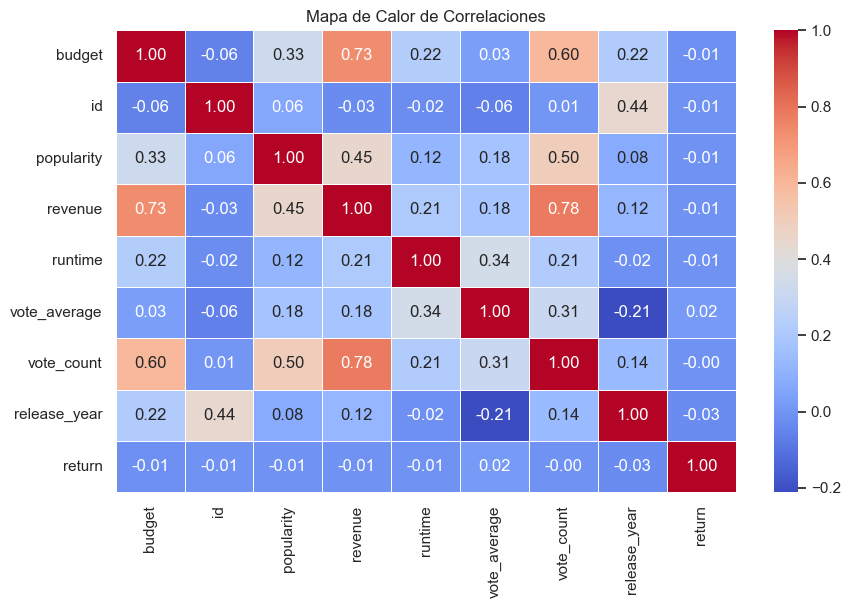

In [21]:
# Seleccionar solo columnas numéricas
numeric_df = df_movies.select_dtypes(include=['float64', 'int64'])

# Verificar el DataFrame numérico resultante
print("Columnas numéricas seleccionadas para el heatmap:")
print(numeric_df.head())

# Heatmap de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

03 ANALISIS DE TEXTO

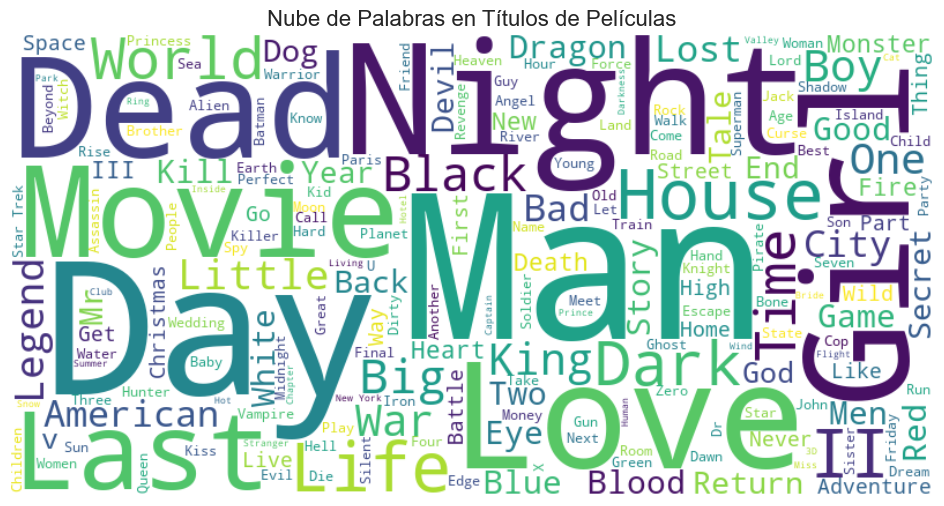

In [25]:
# Combinar todos los títulos
text = " ".join(df_movies['title'].astype(str))

# Generar nube de palabras
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words, background_color="white", colormap="viridis", width=800, height=400).generate(text)

# Mostrar nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras en Títulos de Películas", fontsize=16)
plt.show()

04 IDENTIFICAR PATRONES


Ingresos promedio por género:
genre_names
['Action', 'Adventure', 'Science Fiction', 'Fantasy']       2.068224e+09
['Family', 'Fantasy', 'Adventure']                          1.342000e+09
['Action', 'Animation', 'Adventure', 'Family', 'Comedy']    1.020063e+09
['Adventure', 'Fantasy', 'Family', 'Mystery']               9.382127e+08
['Science Fiction', 'Adventure', 'Action']                  8.500000e+08
                                                                ...     
['Drama', 'Thriller', 'Horror', 'War']                      0.000000e+00
['Drama', 'Thriller', 'Mystery', 'Horror']                  0.000000e+00
['Music', 'Horror', 'Romance']                              0.000000e+00
['Music', 'Family', 'Animation']                            0.000000e+00
['Action', 'Drama', 'Family', 'History', 'War']             0.000000e+00
Name: revenue, Length: 1525, dtype: float64


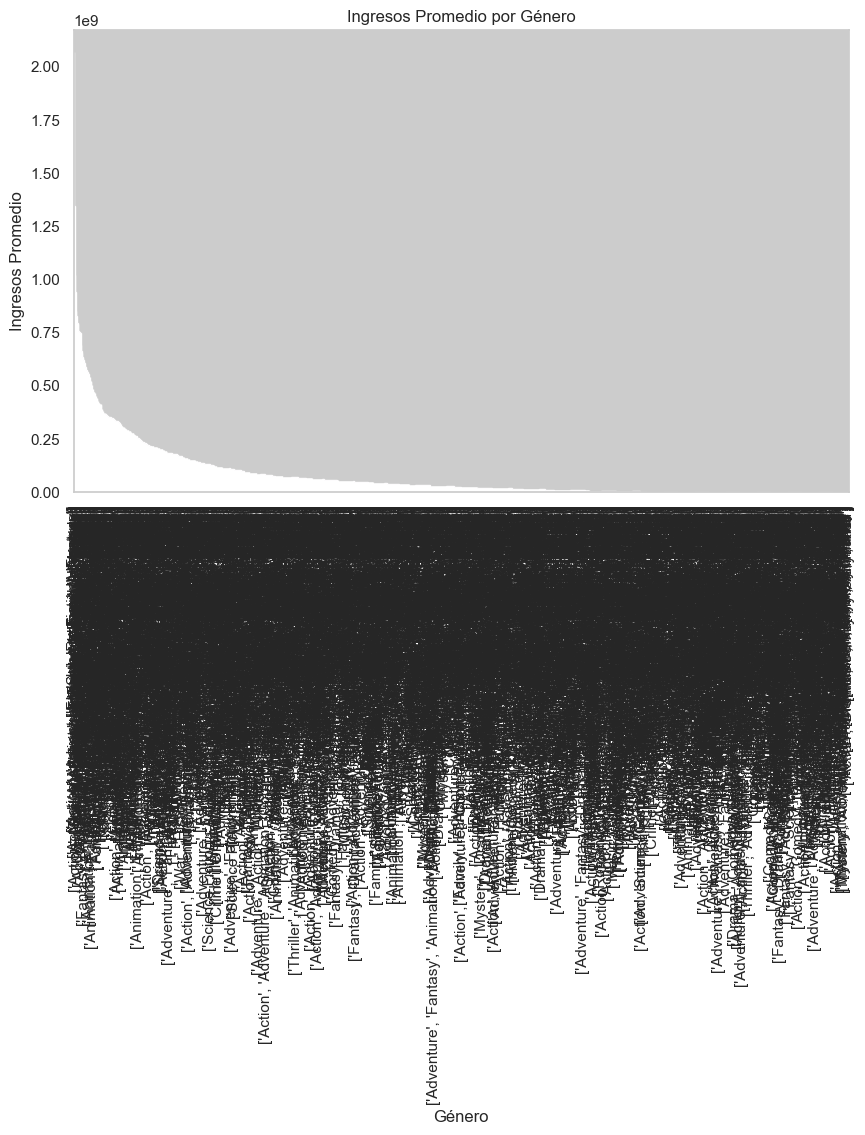


Calificaciones promedio por género:
genre_names
['Adventure', 'Family', 'Animation', 'Action', 'Comedy']    213.849907
['Family', 'Animation', 'Adventure', 'Comedy']              147.222329
['Science Fiction', 'Adventure', 'Thriller']                147.098006
['Drama', 'Science Fiction', 'War']                         146.161786
['Adventure', 'Action', 'Fantasy', 'Comedy']                133.827820
                                                               ...    
['Drama', 'Horror', 'Mystery', 'Foreign']                     0.502636
['Thriller', 'Science Fiction', 'Horror']                     0.494847
['Fantasy', 'Romance', 'Thriller']                            0.449582
['Horror', 'Adventure', 'Fantasy']                            0.396057
['Animation', 'Drama', 'War']                                 0.010902
Name: popularity, Length: 1525, dtype: float64


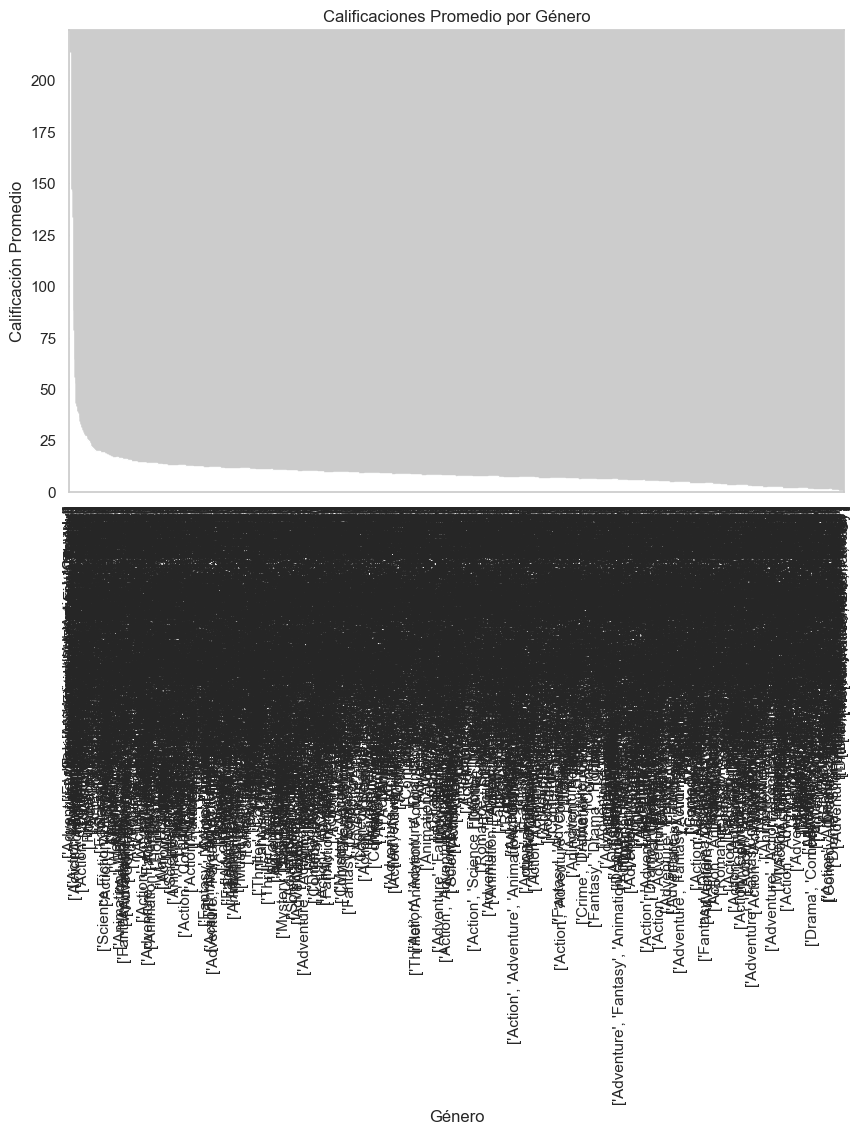

In [29]:
# Ingresos promedio por género
avg_revenue_by_genre = df_movies.groupby('genre_names')['revenue'].mean().sort_values(ascending=False)
print("\nIngresos promedio por género:")
print(avg_revenue_by_genre)

# Visualización de ingresos promedio por género
avg_revenue_by_genre.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title("Ingresos Promedio por Género")
plt.xlabel("Género")
plt.ylabel("Ingresos Promedio")
plt.show()

# Calificaciones promedio por género
avg_popularity_by_genre = df_movies.groupby('genre_names')['popularity'].mean().sort_values(ascending=False)
print("\nCalificaciones promedio por género:")
print(avg_popularity_by_genre)

# Visualización de calificaciones promedio por género
avg_popularity_by_genre.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title("Calificaciones Promedio por Género")
plt.xlabel("Género")
plt.ylabel("Calificación Promedio")
plt.show()